# CONSUMERS AND PRODUCERS IN MONOPOLISTIC COMPETITION

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [6]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt  # This line was missing

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

In a monopolistic market with population of consumers and producers, an agent i maximizes utility as such: 

$U_i = C_i - \frac{1}{\gamma} L^{\gamma}_i$

Where the constraint is: 

$C_i = \frac{P_i}{P} Y_i$

$C_i$ is consumption, $L_i$ is the Labour supply, $Y_i$ is production of good i, $P_i$ is the price of good i, $P$ is aggregate price. The production is:

$Y_i = L^{\alpha}_i$

The demand is:

$Y_i = (\frac{P_i}{P})^{-\eta} Y$ 

$ \Leftrightarrow \frac{Y_i}{Y} = (\frac{P_i}{P})^{-\eta} $

$ \Leftrightarrow \frac{Y_i}{Y}^{\frac{-1}{\eta}} =\frac{P_i}{P}$

In the above, Y is output and $\eta$ denotes elasticity of substitution

$\gamma > 1$, $\alpha \in (0,1)$, and $\eta > 1$, $x \equiv log X$. Furthermore, the aggregate demand is (with M being money supply):

$Y = \frac{M}{P}$

Firstly, we find FOC of the utility wrt. $Y_i$. We note that the utility can be written as the following (by substituting equations):

$U_i = C_i - \frac{1}{\lambda} L^{\gamma}_i \Leftrightarrow$

$U_i = \frac{P_i}{P} Y_i - \frac{1}{\gamma} Y^{\frac{\gamma}{\alpha}}_i \Leftrightarrow$


$U_i = (\frac{Y_i}{Y})^{\frac{-1}{\eta}} Y_i  - \frac{1}{\gamma} Y^{\frac{\gamma}{\alpha}}_i \Leftrightarrow$



Now we derive the FOC by maximizing for $Y_i$:

In [7]:
import sympy as sm

# Defining symbols
Y_i = sm.symbols('Y_i')
U_i = sm.symbols('U_i')
C_i = sm.symbols('C_i')
P_i = sm.symbols('P_i')
P = sm.symbols('P')
L_i = sm.symbols('L_i')
Y = sm.symbols('Y')
M = sm.symbols('M')
eta = sm.symbols('eta')
gamma = sm.symbols('gamma')
alpha = sm.symbols('alpha')

y_i = sm.symbols('y')  # Log of Y
p = sm.symbols('p')  # Log of P
p_i = sm.symbols('p_i')  # Log of P_i

# Defining equations and functions
utility = C_i - (1/gamma) * L_i**gamma  # The representative agent i's utility
c_constraint = sm.Eq(P*C_i, P_i * Y_i)  # Consumption constraint
prod_tech = sm.Eq(Y_i, L_i**alpha)  # The production technology
demand_good = sm.Eq(Y_i, (P_i/P)**(-eta) * Y)  # The demand for good i
demand_agg = sm.Eq(Y, M/P)  # Aggregate demand function

# Solve for variables in constraints
C_from_constraint = sm.solve(c_constraint, C_i)[0]
L_from_tech = sm.solve(prod_tech, L_i)[0]
PiP_from_demand = sm.solve(demand_good, P_i/P)[0]


# Substitute the budget constraint into the utility function
objective = utility.subs(C_i, C_from_constraint)

# Substitute the production technology into the modified utility function
objective2 = objective.subs(L_i, L_from_tech)

# Substitute the demand function into the modified utility function
objective3 = objective2.subs(P_i/P, PiP_from_demand)


#After the substitution we get the following expression for the utility
print(objective3)





Y_i*(Y/Y_i)**(1/eta) - (Y_i**(1/alpha))**gamma/gamma


In [8]:
foc = sm.diff(objective3, Y_i)
foc

#By manually rearranging we get

objective4 = sm.Eq((1-1/eta)*(Y_i/Y)**(-1/eta), (1/alpha)*Y_i**((gamma-alpha)/alpha))

objective5 = sm.Eq((1-1/eta)*P_i/P, (1/alpha)*Y_i**((gamma-alpha)/alpha))

sm.pprint(objective5)



#Now we take logs to the expression

lhs = objective5.lhs  # Left-hand side of the equation
rhs = objective5.rhs  # Right-hand side of the equation

# Take the natural log of both sides (use sm.log for symbolic logarithm)
log_lhs = sm.log(lhs)
log_rhs = sm.log(rhs)

objective6 = sm.Eq(log_lhs, log_rhs)

sm.pprint(objective6)  # Displays the logged equation

# Construct the equation
objective7 = sm.Eq(y_i, (alpha / (gamma - alpha)) * (p_i - p) +  (alpha / (gamma - alpha)) * (sm.log(1 - 1/eta) - sm.log(1/alpha)))


sm.pprint(objective7)  # Displays the logged equation



               -α + γ
   ⎛    1⎞     ──────
Pᵢ⋅⎜1 - ─⎟       α   
   ⎝    η⎠   Yᵢ      
────────── = ────────
    P           α    
                     ⎛  -α + γ⎞
   ⎛   ⎛    1⎞⎞      ⎜  ──────⎟
   ⎜Pᵢ⋅⎜1 - ─⎟⎟      ⎜    α   ⎟
   ⎜   ⎝    η⎠⎟      ⎜Yᵢ      ⎟
log⎜──────────⎟ = log⎜────────⎟
   ⎝    P     ⎠      ⎝   α    ⎠
                    ⎛     ⎛1⎞      ⎛    1⎞⎞
                  α⋅⎜- log⎜─⎟ + log⎜1 - ─⎟⎟
    α⋅(-p + pᵢ)     ⎝     ⎝α⎠      ⎝    η⎠⎠
y = ─────────── + ─────────────────────────
       -α + γ               -α + γ         


Plot y_i and gamma.

When gamma increases, a lower degree of real rigidity obtains. 

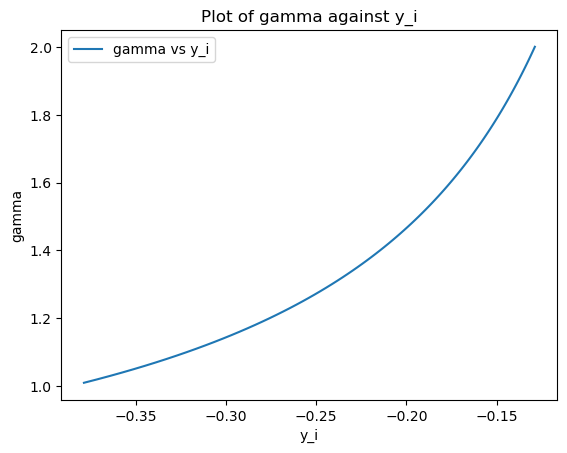

In [9]:


# Example values for constants
alpha_val = 0.5
p_i_val = 2
p_val = 1
eta_val = 2

# Set up the symbolic equation
objective7_sym = sm.Eq(y_i, (alpha / (gamma - alpha)) * (p_i - p) + 
                       (alpha / (gamma - alpha)) * (sm.log(1 - 1/eta) - sm.log(1/alpha)))

# Define a range of gamma values (avoiding gamma = alpha to prevent division by zero)
gamma_values = np.linspace(alpha_val + 0.51, 2, 100)

# Calculate y_i for each gamma value
y_i_values = []
for gamma_val in gamma_values:
    # Substitute gamma value and constants into the symbolic equation and solve for y_i
    y_i_val = objective7_sym.subs({gamma: gamma_val, alpha: alpha_val, p_i: p_i_val, p: p_val, eta: eta_val}).rhs
    y_i_values.append(y_i_val.evalf())  # Evaluate the expression and append to the list

# Plot y_i vs gamma with y_i on the x-axis and gamma on the y-axis
plt.plot(y_i_values, gamma_values, label='gamma vs y_i')
plt.xlabel('y_i')
plt.ylabel('gamma')
plt.title('Plot of gamma against y_i')
plt.legend()
plt.show()

From the above we can see, that as demand increases, gamma will increase. As gamma increase a lower degree of real rigidity obtains. A low degree of real rigidity means, that changes in the relative price, pi - p, have a smaller effect on yi, as lambda increases.

Now we plot the effect on yi when pi-p changes for different values of gamma. 

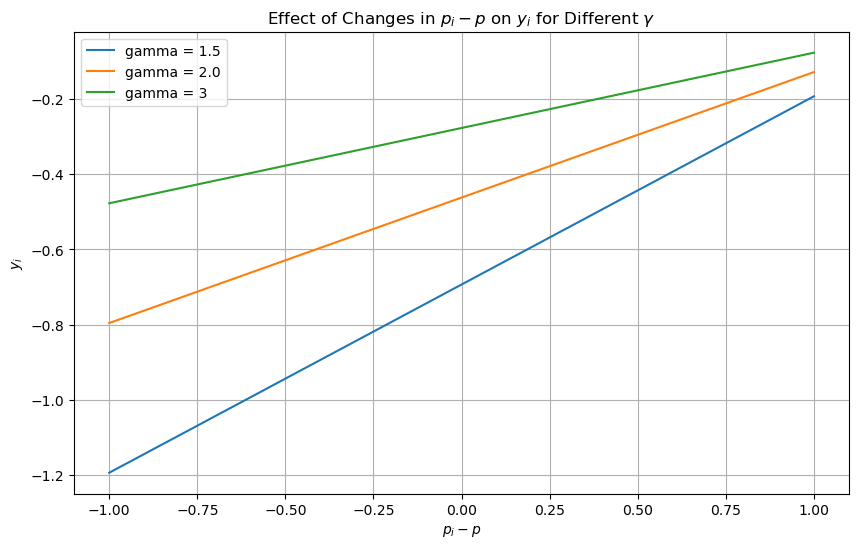

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sm

# Constants
alpha_val = 0.5
eta_val = 2
p_val = 1  # Normalize p to simplify calculations

# The equation for yi is given by: 
expr = (alpha / (gamma - alpha)) * (p_i - p) + (alpha / (gamma - alpha)) * (sm.log(1 - 1/eta) - sm.log(1/alpha))

# We then define a range for p_i - p and gamma
p_i_minus_p_range = np.linspace(-1, 1, 100)  # Range for p_i - p
gamma_values = [1.5, 2.0, 3]  # Example gamma values to show effect

plt.figure(figsize=(10, 6))

# Calculate and plot y_i for each gamma. The constants in the equation is set equal to the assumed values. 
for gamma_val in gamma_values:
    y_i_values = [expr.subs({
        alpha: alpha_val,
        gamma: gamma_val,
        eta: eta_val,
        p: p_val,
        p_i: p_val + delta_p  # p_i is p + delta_p
    }).evalf() for delta_p in p_i_minus_p_range]

    plt.plot(p_i_minus_p_range, y_i_values, label=f'gamma = {gamma_val}')

# Adding plot details
plt.title('Effect of Changes in $p_i - p$ on $y_i$ for Different $\gamma$')
plt.xlabel('$p_i - p$')
plt.ylabel('$y_i$')
plt.legend()
plt.grid(True)
plt.show()

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 